In [158]:
import os
import re

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# This one should be used if you are importing from your local files (training)
from google.colab import files
uploaded = files.upload()

Saving 2020-09-20 till 2020-10-13.csv to 2020-09-20 till 2020-10-13.csv


In [159]:
# This one is for files that originate from a google drive (scraped data)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# this is the training data (tweets from 2020 before twitter changed the access to their tweets)
df_2020 = pd.read_csv('2020-09-20 till 2020-10-13.csv')

In [ ]:
df_2020.head()

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
0,2020-09-23 18:39:34,CrystalPalace,66,495,Crystal Palace FC,NaN,0,tw_footballtalk,#CrystalPalace OR #CPFC,Onto Week 2 of Premier League Stars of the Wee...,1308838436233711616,TW,0.0000,EPL,CrystalPalace
1,2020-09-23 18:39:18,CrystalPalace,0,0,Crystal Palace FC,NaN,0,crystalpalaced1,#CrystalPalace OR #CPFC,Our palace team will put our hearts out for ou...,1308838367254269954,crystalpalacedan,0.1531,EPL,CrystalPalace
2,2020-09-23 18:28:15,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Chelsea v Palace kick-off time changed and TV ...,1308835588229996545,Crystal Palace News,0.0000,EPL,CrystalPalace
3,2020-09-23 18:28:15,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Academy redevelopment update: Exclusive footag...,1308835585902116867,Crystal Palace News,0.1280,EPL,CrystalPalace
4,2020-09-23 18:27:39,CrystalPalace,0,0,Crystal Palace FC,NaN,0,crystalpalaced1,#CrystalPalace OR #CPFC,@ChelseaFC I still have no entire clue why us ...,1308835436652105728,crystalpalacedan,-0.1027,EPL,CrystalPalace


Labeling as positive or negative sentiment given the dataset from before where polarity is meant to show sentiment.

In [6]:
def get_label(polarity_score):
  if polarity_score < 0:
    return 0
  else:
    return 1
df_2020['label'] = df_2020['polarity'].apply(get_label)
df_2020.head()

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1,label
0,2020-09-23 18:39:34,CrystalPalace,66,495,Crystal Palace FC,NaN,0,tw_footballtalk,#CrystalPalace OR #CPFC,Onto Week 2 of Premier League Stars of the Wee...,1308838436233711616,TW,0.0000,EPL,CrystalPalace,1
1,2020-09-23 18:39:18,CrystalPalace,0,0,Crystal Palace FC,NaN,0,crystalpalaced1,#CrystalPalace OR #CPFC,Our palace team will put our hearts out for ou...,1308838367254269954,crystalpalacedan,0.1531,EPL,CrystalPalace,1
2,2020-09-23 18:28:15,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Chelsea v Palace kick-off time changed and TV ...,1308835588229996545,Crystal Palace News,0.0000,EPL,CrystalPalace,1
3,2020-09-23 18:28:15,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Academy redevelopment update: Exclusive footag...,1308835585902116867,Crystal Palace News,0.1280,EPL,CrystalPalace,1
4,2020-09-23 18:27:39,CrystalPalace,0,0,Crystal Palace FC,NaN,0,crystalpalaced1,#CrystalPalace OR #CPFC,@ChelseaFC I still have no entire clue why us ...,1308835436652105728,crystalpalacedan,-0.1027,EPL,CrystalPalace,0


Simplifying down to just the text and label

In [14]:
data_whole = df_2020[['twitter_id', 'text', 'label']]
data = data_whole.sample(n=7500, random_state=42)
data.head()

,twitter_id,text,label
69768,1311736859752624131,"When Liverpool, Man Utd, Chelsea and Man City ...",1
138205,1311652333730881537,#LUFC have won 3 of their last 5 #PL meetings ...,1
150654,1310729922785222663,@ph_Maher7 @Moazwaheed5 @Rakha1172 Dabbing is ...,1
140468,1310066111241547777,@speedomick @richarlison97 @Everton @TraciDoch...,1
127724,1308432694871691267,League Cup action is back! City host Bournemou...,1


Splitting into train and test data

In [139]:
from sklearn.model_selection import train_test_split

X = data.text.values
y = data.label.values
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2020)
X_train, X_val, y_train, y_val = train_test_split(X_other, y_other, test_size = 0.1, random_state = 2020)
print('X_train: ', X_train[:5])
print('X_val: ', X_val[:5])
print('y_train: ', y_train[:5])
print('y_val: ', y_val[:5])

X_train:  ["'He's not playing badly' - Pundit defends under-fire Everton man following transfer news - https://t.co/WWk4mCVuOh #EvertonFC #EFC"
 'If Fofana’s announcement isn’t a Big Cook Little Cook parody with Morgan then I don’t want it #lcfc #BigWesLittleWes'
 '#mufc are hoping to strike a deal with Porto for Alex Telles this week and it remains to be seen if they try to thrash out a deal with Borussia Dortmund for Jadon Sancho. #cdlive [@TelegraphDucker]  [𝐓𝐈𝐄𝐑 - 1]'
 '@fireboydml to the world👏🏿👏🏿👏🏿 #BBNaijia  #Laycon  #bbnaija2020  #MUFC https://t.co/jFm1ry6Svn'
 'Are #THFC serious title contenders?  https://t.co/4Za6kOOAAb']
X_val:  ['Laughing that we might be signing that Scholloto or whatever his name is. The meltdown on here will be hilarious. #cpfc'
 'Prove them wrong Ox #LFC https://t.co/5fDR8PiVsa'
 '🚨Ben Godfrey passes medical as he edges closer to sealing £25m move to Everton🔵✅ [@MailSport] #EFC #NCFC'
 'Love hearing the coaching from mou on the sideline in this game. Al

The test data will be our scraped tweets.

In [160]:
folder_path = '/content/drive/My Drive/Colab Notebooks/dataset/'
def read_folder(folder):
    examples = []
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):  # Check if it's a directory
            files_read = 0  # Counter for the number of files read from each folder
            for fname in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, fname)
                if os.path.isfile(file_path) and file_path.endswith('.txt'):  # Check if it's a file and ends with '.txt'
                    with open(file_path, encoding='utf8') as f:
                        examples.append(f.readline().strip())
    return examples
test_examples = read_folder(folder_path)
print('Number of examples: {}'.format(len(test_examples)))
print('Sample example: {}\n\n'.format(test_examples[0]))
print(test_examples[:10])

Number of examples: 7657
Sample example: Sheffield United manager Chris Wilder has confirmed that Jadon Bogle and Jack Robinson will miss their upcoming #PL match against Burnley due to their injuries.   #SUFC


['Sheffield United manager Chris Wilder has confirmed that Jadon Bogle and Jack Robinson will miss their upcoming #PL match against Burnley due to their injuries.   #SUFC', 'Whatever the outcome on Saturday, what a season it s been.  Let s go one final time on Saturday!   ️ #SUFC #RootsHall', "Aldershot and Gateshead tease each other over 'hoo-ha' for postponed fixture - https://t.co/8C9veElgPk  #afc #avfc #afcb #brentfordfc #bhafc #twitterclarets #cfc #cpfc #efc #ffc #lfc #coyh #ltfc #mancity #mufc #nufc #nffc #twitterblades #sufc #thfc #coys #whufc #coyi #wwfc", 'Prince Abdullah on Instagram. #twitterblades #sufc https://t.co/gkV3YwUrwL', 'Barnsley player gets hit in the head by Portsmouth fan during pitch invasion -  https://t.co/Wloq1qLlcZ  #afc #avfc #afcb #brentfordfc #bh

In [140]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


Baseline: TF-IDF and Naive Bayes Classifier. We will use TF-IDF to vectorize our text then use the Naive Bayes model as our classifier.

Data preprocessing: In the bag-of0words model, a text is represented as the bag of its words, disregarding grammar and word order. We want to remove stop words, punctuations, and characters that don't contribute much to the sentence's meaning.

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def text_preprocessing(s):
  '''
  - change all to lowercase
  - change "'t" to "not"
  - remove "@name"
  - remove punctuations except "?"
  - remove stop words except "not" and "can"
  - remove trailing whitespace
  '''
  # lower case
  s = s.lower()
  # change 't to not
  s = re.sub(r"\'t", " not", s)
  # remove @name
  s = re.sub(r'(@.*?)[\s]', ' ', s)
  # Isolate and remove punctuations except '?'
  s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r'  ', s)
  s = re.sub(r'[^\w\s\?]', ' ', s)
  # Remove some special characters
  s = re.sub(r'([\;\:\|•«\n])', ' ', s)
  # Remove stopwords except 'not' and 'can'
  s = " ".join([word for word in s.split()
                if word not in stopwords.words('english')
                or word in ['not', 'can']])
  # Remove trailing whitespace
  s = re.sub(r'\s+', ' ', s).strip()

  return s


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TF-IDF Vectorizer (term frequency-inverse document frequency) reflects how important a word is to a document in a collection.

In [145]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess X_train and X_val separately
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train])
X_val_preprocessed = np.array([text_preprocessing(text) for text in X_val])
X_test_preprocessed = np.array([text_preprocessing(text) for text in X_test])

# Initialize TF-IDF vectorizer
tf_idf = TfidfVectorizer(ngram_range=(1, 3), binary=True, smooth_idf=False)

# Fit and transform TF-IDF vectorizer on X_train_preprocessed
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)

# Transform X_val_preprocessed and X_test_preprocessed using the fitted TF-IDF vectorizer
X_val_tfidf = tf_idf.transform(X_val_preprocessed)
X_test_tfidf = tf_idf.transform(X_test_preprocessed)

CPU times: user 24.8 s, sys: 3.17 s, total: 28 s
Wall time: 33.4 s


Training the naive bayes classifier

In [146]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scipy.sparse import vstack

def get_auc_CV(model):
    '''
    Return the average AUC score from cross-validation
    '''
    # Set KFold to shuffle data pre-split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Concatenate training and validation features
    X_train_val = vstack((X_train_tfidf, X_val_tfidf))

    # Concatenate training and validation target labels
    y_train_val = np.concatenate((y_train, y_val))

    # Get AUC scores
    auc = cross_val_score(model, X_train_val, y_train_val, scoring="roc_auc", cv=kf)
    return auc.mean()

In [142]:
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print("Unique classes:", unique_classes)
print("Class counts:", set(class_counts))

Unique classes: [0 1]
Class counts: {4908, 1167}


MultinominalNB class has one hyperparameter-alpha. We optimize it below. can change the np.arange values if you want to get a better graph

Best alpha:  0.32


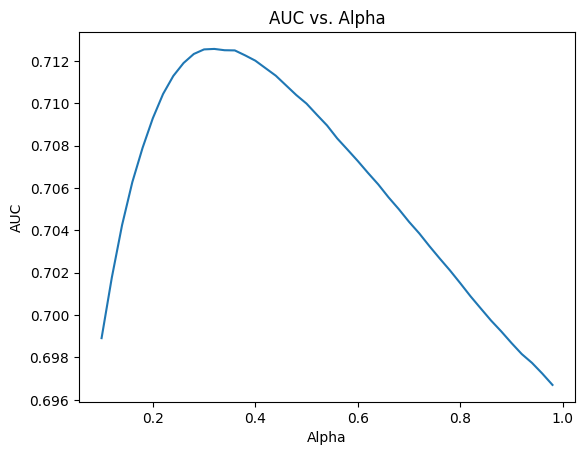

In [147]:
from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(alpha = i))
                 for i in np.arange(0.1, 1, 0.02)],
                index=np.arange(0.1, 1, 0.02))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

Evaluating on the validation set

In [148]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
  '''
  - print auc and accuracy on validation set
  - plot roc
  @params   probs (np.array): array of predicted probabilities with shape (len(y_true), 2)
  @params   y_true (np.array): array of the true values with shape (len(y_true),)
  '''
  preds = probs[:, 1]
  fpr, tpr, threshold = roc_curve(y_true, preds)
  roc_auc = auc(fpr, tpr)
  print(f'AUC: {roc_auc:.4f}')
  # accuracy over test set
  y_pred = np.where(preds >= 0.5, 1, 0)
  accuracy = accuracy_score(y_true, y_pred)
  print(f'Accuracy: {accuracy*100:.2f}%')

  # plot ROC AUC
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

AUC: 0.7029
Accuracy: 85.73%


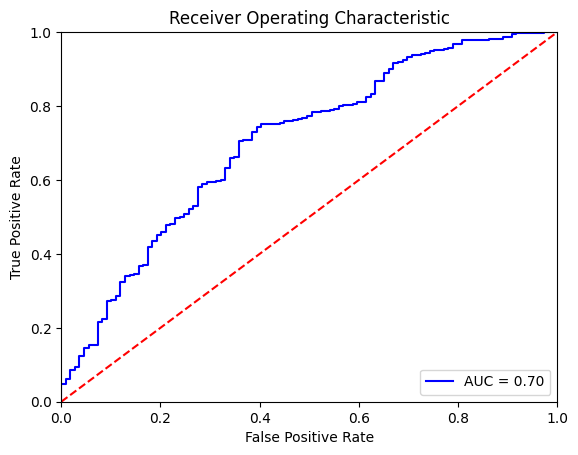

In [150]:
# Compute predicted probabilities
nb_model = MultinomialNB(alpha=best_alpha)
nb_model.fit(vstack((X_train_tfidf, X_val_tfidf)), np.concatenate((y_train, y_val)))
probs = nb_model.predict_proba(X_test_tfidf)

# Evaluate the classifier
evaluate_roc(probs, y_test)

Above is the baseline performance and will be used to evaluate the performance of our fine-tuned BERT model.

Tokenization and formatting

In [12]:
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '#AFC')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '#name'
    text = re.sub(r'(#.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove links
    text = re.sub(r'https?://\S+', '', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

BERT Tokenizer. We must add special tokens to the start and end of each sentence, pad and truncate all sentences to a single constant length, and specify what are padding tokens with the "attention mask".  
`encode_plus`:  
- split text into tokens
- add the special `[CLS]` and `[SEP]` tokens
- convert these tokens into indexes of the tokenizer vocabulary
- pad or truncate sentences to max length
- create attention mask

In [13]:
from transformers import DistilBertTokenizer, DistilBertModel

# Change the tokenizer to DistilBERT's tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

def preprocessing_for_distilbert(data, max_length=512):
    '''
    Perform required preprocessing steps for pretrained DistilBERT.
    @param   data (np.array): Array of texts to be processed.
    @param   max_length (int): Maximum sequence length.
    @return  input_ids (torch.Tensor): Tensor of token ids to be fed to a model
    @return  attention_masks (torch.Tensor): Tensor of indices specifying which tokens should be attended to by the model
    '''
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # Encode the sentence
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=max_length,          # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            truncation=True,                # Explicitly truncate to max_length
            return_attention_mask=True      # Return attention mask
        )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

we need to specify the maximum length of our sentences now

In [23]:
all_tweets = np.concatenate([data.text.values, test_examples])

#Encode our concatenated data
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_tweets]

#Find the maximum length
max_len = max([len(sent) for sent in encoded_tweets])
print('Max Length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (615 > 512). Running this sequence through the model will result in indexing errors


Max Length:  615


In [152]:
import torch
# Specify `MAX_LEN`
MAX_LEN = 128

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_distilbert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_distilbert(X_train, max_length=MAX_LEN)
val_inputs, val_masks = preprocessing_for_distilbert(X_val, max_length=MAX_LEN)
test_inputs, test_masks = preprocessing_for_distilbert(X_test, max_length=MAX_LEN)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  When Liverpool, Man Utd, Chelsea and Man City will learn Champions League fixture dates | #LFC | #MUFC | #CFC | #MCFC  https://t.co/GjjDVbFgBp https://t.co/aTIgDhqr9s
Token IDs:  [101, 6220, 2158, 21183, 2094, 9295, 2158, 2103, 4553, 3966, 2223, 15083, 5246, 1048, 11329, 14163, 11329, 12935, 2278, 11338, 11329, 16770, 2522, 1043, 3501, 3501, 2094, 26493, 2546, 18259, 2361, 16770, 2522, 2012, 8004, 16425, 4160, 2099, 2683, 2015, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [153]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train).to(device)
val_labels = torch.tensor(y_val).to(device)
test_labels = torch.tensor(y_test).to(device)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

#Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size = batch_size)

**Training our model**

Create BertClassifier:  
BERT-base consists of 12 transformer layers, each transformer layer takes in a list of token embeddings and produces the same number of embeddings with the same hidden size (or dimensions) on the output. The output of the final transformer layer of the `[CLS]` token is used as the features of the sequence to feed a classifier.  

The `transformers` library has the `BertForSequenceClassification` class which is designed for classification tasks. We will create a new class so we can specify our own choice of classifiers.  
We will create a BertClassifier class with a BERT model to extract the last hidden layer of the `[CLS]` token and a single-hidden-layer feed-forward neural network as our classifier.

In [154]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

class DistilBertClassifier(nn.Module):
    """DistilBERT Model for Classification Tasks.
    """
    def __init__(self, freeze_distilbert=False):
        """
        @param    freeze_distilbert (bool): Set `False` to fine-tune the DistilBERT model
        """
        super(DistilBertClassifier, self).__init__()

        # Instantiate DistilBERT model
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')

        # Instantiate a feed-forward classifier
        self.classifier = nn.Linear(768, 2)  # Assuming binary classification

        # Freeze the DistilBERT model if specified
        if freeze_distilbert:
            for param in self.distilbert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to DistilBERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to DistilBERT
        outputs = self.distilbert(input_ids=input_ids,
                                  attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 101 µs, sys: 0 ns, total: 101 µs
Wall time: 107 µs


**Optimizer and Learning Rate Scheduler**

Recommended hyper-parameters:  
- Batch size: 16 or 32
- Learning rate (Adam): 5e-5, 3e-5, or 2e-5.
- Number of epochs: 2, 3, 4.

Huggingface provided the run_glue.py script as an example of implementing the `transformers` library. The AdamW optimizer is used.

In [155]:
def initialize_distilbert_model(epochs=2):
    # Create the DistilBertClassifier model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    distilbert_classifier = DistilBertClassifier().to(device)

    # Define the optimizer
    optimizer = AdamW(distilbert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                     )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Create the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)

    return distilbert_classifier, optimizer, scheduler


**Training Loop**

We will train our Bert Classifier for 4 epochs. In each epoch, we will train our model and evaluate its performance on the validation set.  
Training:  
- Unpack our data from the dataloader and load the data onto the GPU
- Zero out gradients calculated in the previous pass
- Perform a forward pass to compute logits and loss
- Perform a backward pass to compute gradients (`loss.backward()`)
- Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
- Update the model's parameters (`optimizer.step()`)
- Update the learning rate (`scheduler.step()`)

Evaluation:   
- Unpack our data and load onto the GPU
- Forward pass
- Compute loss and accuracy rate over the validation set

In [28]:
# This is with 7500 tweets from the larger dataset
# Import necessary libraries
import random
import time
import torch
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

# Specify loss function
loss_fn = torch.nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def initialize_distilbert_model(epochs=2):
    # Create the DistilBertClassifier model
    distilbert_classifier = DistilBertClassifier()

    # Define the optimizer
    optimizer = AdamW(distilbert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                     )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Create the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)

    return distilbert_classifier, optimizer, scheduler

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the DistilBertClassifier model."""

    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):

        # =======================================
        #               Training
        # =======================================

        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts += 1

            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

            # Free up GPU memory at the end of each batch
            del batch
            torch.cuda.empty_cache()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        print("-"*70)

        # =======================================
        #               Evaluation
        # =======================================

        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")

    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set."""

    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

# Set seed for reproducibility
set_seed(42)

# Initialize model, optimizer, and scheduler
distilbert_classifier, optimizer, scheduler = initialize_distilbert_model(epochs=2)

# Train the model
train(distilbert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.495802   |     -      |     -     |  398.98  
   1    |   40    |   0.398346   |     -      |     -     |  428.57  
   1    |   60    |   0.361426   |     -      |     -     |  510.89  
   1    |   80    |   0.309334   |     -      |     -     |  374.93  
   1    |   100   |   0.317119   |     -      |     -     |  367.37  
   1    |   120   |   0.300220   |     -      |     -     |  367.11  
   1    |   140   |   0.322540   |     -      |     -     |  375.14  
   1    |   160   |   0.290116   |     -      |     -     |  368.26  
   1    |   180   |   0.254777   |     -      |     -     |  365.47  
   1    |   187   |   0.357611   |     -      |     -     |  118.72  
----------------------------------------------------------------------
   1    |    -    |   0.340387   |  0.286765  |   86.61   |  3954.15 

In [ ]:
# This is the trained model with 10000 samples from the larger dataset

# Import necessary libraries
import random
import time
import torch
from transformers import AdamW, get_linear_schedule_with_warmup

# Specify loss function
loss_fn = torch.nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def initialize_distilbert_model(epochs=2):
    # Create the DistilBertClassifier model
    distilbert_classifier = DistilBertClassifier()

    # Define the optimizer
    optimizer = AdamW(distilbert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                     )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Create the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)

    return distilbert_classifier, optimizer, scheduler

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the DistilBertClassifier model."""

    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):

        # =======================================
        #               Training
        # =======================================

        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts += 1

            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

            # Free up GPU memory at the end of each batch
            del batch
            torch.cuda.empty_cache()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        print("-"*70)

        # =======================================
        #               Evaluation
        # =======================================

        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")

    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set."""

    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

# Set seed for reproducibility
set_seed(42)

# Initialize model, optimizer, and scheduler
distilbert_classifier, optimizer, scheduler = initialize_distilbert_model(epochs=2)

# Train the model
train(distilbert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.521009   |     -      |     -     |  468.02  
   1    |   40    |   0.429261   |     -      |     -     |  439.09  
   1    |   60    |   0.326866   |     -      |     -     |  431.94  
   1    |   80    |   0.275949   |     -      |     -     |  435.98  
   1    |   100   |   0.322715   |     -      |     -     |  436.49  
   1    |   120   |   0.280475   |     -      |     -     |  439.98  
   1    |   140   |   0.278911   |     -      |     -     |  439.19  
   1    |   160   |   0.251484   |     -      |     -     |  436.42  
   1    |   180   |   0.292335   |     -      |     -     |  434.44  
   1    |   200   |   0.283431   |     -      |     -     |  438.87  
   1    |   220   |   0.227002   |     -      |     -     |  437.02  
   1    |   240   |   0.266619   |     -      |     -     |  441.51  


In [96]:
import torch.nn.functional as F

def distilbert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()
    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to CPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        all_logits.append(logits)

        # Free up GPU memory
        del b_input_ids
        del b_attn_mask
        torch.cuda.empty_cache()

    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs


In [156]:
# Compute predicted probabilities on the test set
# probs = distilbert_predict(distilbert_classifier, val_dataloader)
probs = distilbert_predict(distilbert_classifier, test_dataloader)

AUC: 0.5021
Accuracy: 73.07%


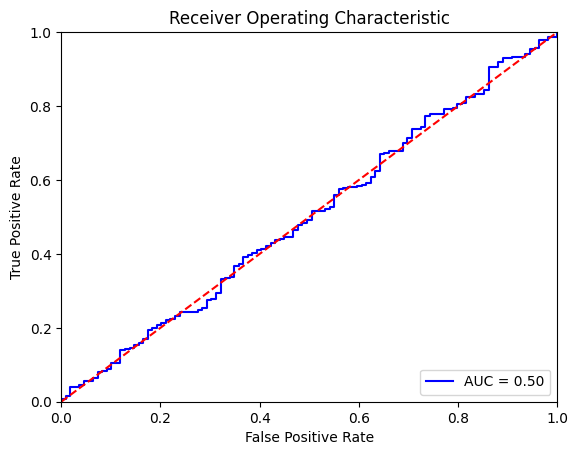

In [157]:
# Evaluate the Bert classifier
# evaluate_roc(probs, y_val)
evaluate_roc(probs, y_test)

AUC: 0.9397
Accuracy: 90.15%


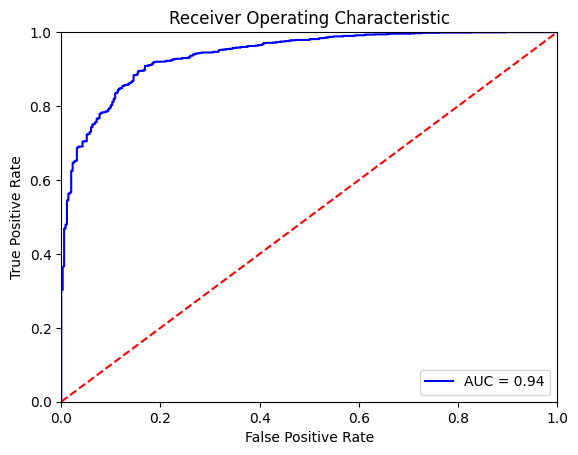

In [ ]:
# Evaluate the Bert classifier
# evaluate_roc(probs, y_val)
#evaluate_roc(probs, y_test)